<a href="https://colab.research.google.com/github/mswiseman/nifa_awards/blob/main/2023_NIFA_Predoc_Awards_Visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 USDA Predoctoral Award Visualization
This notebook certainly borne out of dissapointment for not recieving the 2023 nifa predoctoral fellowship, though I learned some interesting things in the process. Feel free to explore on your own. 

## Install required packages

In [ ]:
# Uncomment and install packages as necessary
#!pip install bs4 pandas requests matplotlib wordcloud geopandas numpy

## Load required packages

In [57]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from wordcloud import WordCloud
import geopandas as gpd
import numpy as np
from collections import Counter
from IPython.display import Image

Next, you can navigate over to the [usda predoctoral awardees page](https://cris.nifa.usda.gov/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=%28GC%3DA7101%29&format=WEBTITLESGIY) and copy + paste the source information below. I accessed this on June 1st 2023 and pasted the html below. You can use my html, generate your own, or load it using [requests](https://pypi.org/project/requests/). 

In [4]:
# I just copied the html from the website and pasted it below

html = """
<center><table width=800><tr><td align=right>Retrieved 577 records</td></tr></table></center>
<center><table width=800 cellspacing=0 cellpadding=3 border=1><tr class="tableheader" valign=bottom style="text-align:center">
<th>Title</th><th>Initial<br />Award Yr</th><th>Grant Yr</th><th>Prop No</th><th>Investigator</th><th>Institution</th><th width=42>View</th></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">WHERE CAN WE GROW? MACHINE LEARNING TO PREDICT CLIMATE IMPACTS ON U.S. CORN AND SOYBEAN SUITABILITY</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11407</td><td style="padding-top:3px; padding-bottom:3px">Smith, H.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF ARKANSAS<br />FAYETTEVILLE, ARKANSAS</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99778&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99778&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">INVESTIGATING MECHANISMS OF CLIMATE ADAPTATION IN A PLANT PATHOGEN</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11400</td><td style="padding-top:3px; padding-bottom:3px">Donegan, M.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF CALIFORNIA, BERKELEY<br />BERKELEY, CALIFORNIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99732&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99732&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">A MIXED METHODS APPROACH TO RESOLVING CONSERVATION AND LIVELIHOOD CONFLICTS IN RURAL COMMUNITIES IN THE AMERICAN WEST</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11401</td><td style="padding-top:3px; padding-bottom:3px">Maher, S.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF CALIFORNIA, BERKELEY<br />BERKELEY, CALIFORNIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99747&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99747&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">COMBINATORIAL EFFECTS OF SALINITY AND DROUGHT STRESS ON ROOT APOPLASTIC BARRIER DEVELOPMENT IN PISTACIA VERA</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11448</td><td style="padding-top:3px; padding-bottom:3px">Zhang, S.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF CALIFORNIA, DAVIS<br />DAVIS, CALIFORNIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99785&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99785&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">FINE-TUNING CROP RESILIENCE BY CHARACTERIZING PLANT IMMUNE RESPONSE-INDUCED TARGETED PROTEIN DEGRADATION</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11442</td><td style="padding-top:3px; padding-bottom:3px">Hamada, N. M.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF CALIFORNIA, DAVIS<br />DAVIS, CALIFORNIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99789&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99789&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">INVESTIGATING THE ROLE OF BIOCHAR AS A SOIL NOX MITIGATION TOOL IN ALMOND ORCHARD SYSTEMS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11451</td><td style="padding-top:3px; padding-bottom:3px">Harrison, B. P.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF CALIFORNIA, MERCED<br />MERCED, CALIFORNIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99763&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99763&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">CHARACTERIZING THE BIOSYNTHESIS AND STRUCTURE-FUNCTION OF STRIGOLACTONES TO ENHANCE BENEFICIAL MICROBIAL SYMBIOSIS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11453</td><td style="padding-top:3px; padding-bottom:3px">Gushue, A.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF CALIFORNIA, RIVERSIDE<br />RIVERSIDE, CALIFORNIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99784&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99784&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">INVESTIGATING METABOLIC IMPLICATIONS OF REPRODUCTIVE TRACT MICROBIOME IN LAYER HENS AND BROILER BREEDERS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11410</td><td style="padding-top:3px; padding-bottom:3px">Ellwood, K.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF DELAWARE<br />NEWARK, DELAWARE</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99727&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99727&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">THE EFFECT OF DOMESTICATION ON MICROBIAL COMMUNITY ASSEMBLY, FUNCTIONALITY, AND STABILITY</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11417</td><td style="padding-top:3px; padding-bottom:3px">Rawstern, A.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF MIAMI<br />CORAL GABLES, FLORIDA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99728&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99728&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">IMPACT OF A BERRY-RICH DIET ON INTESTINAL BARRIER DYSFUNCTION AND ASSOCIATED DEVELOPMENT OF HYPERTENSION</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11326</td><td style="padding-top:3px; padding-bottom:3px">Danh, J. P.</td><td style="padding-top:3px; padding-bottom:3px">GEORGIA STATE UNIVERSITY<br />ATLANTA, GEORGIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99766&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99766&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">EXAMINING THE INFLUENCE OF DIVERSE STAKEHOLDER COLLABORATION ON LAND MANAGEMENT & AGRICULTURAL SUSTAINABILITY IN THE THUNDER BASIN ECOREGION (TBER)</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11299</td><td style="padding-top:3px; padding-bottom:3px">Levy, M.</td><td style="padding-top:3px; padding-bottom:3px">BOISE STATE UNIVERSITY<br />BOISE, IDAHO</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99782&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99782&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">UTILIZING BIOMECHANICAL ENGINEERING METHODOLOGIES, AND DEVICES TO AID IN PLANT SCIENTISTS IN QUANTIFYING CROP LODGING RESISTANCE</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11389</td><td style="padding-top:3px; padding-bottom:3px">Tabaracci, K.</td><td style="padding-top:3px; padding-bottom:3px">UNIV OF IDAHO<br />MOSCOW, IDAHO</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99787&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99787&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">ROLES OF REL2 MEDIATED TRANSCRIPTIONAL CO-REPRESSION IN MAIZE IMMUNITY</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11425</td><td style="padding-top:3px; padding-bottom:3px">Griffin, B. D.</td><td style="padding-top:3px; padding-bottom:3px">IOWA STATE UNIVERSITY<br />AMES, IOWA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99800&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99800&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">BUILDING BETTER BIOINOCULANTS: USING EXPERIMENTAL EVOLUTION TO IMPROVE THE EFFICACY OF A PLANT GROWTH-PROMOTING RHIZOBACTERIA</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11460</td><td style="padding-top:3px; padding-bottom:3px">Clouse, K.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF KANSAS CENTER FOR RESEARCH, INC.<br />LAWRENCE, KANSAS</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99781&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99781&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">EXPLORING MICROBIOME DIVERSITY ANALYSIS FOR ESTIMATING THE GEOGRAPHIC ORIGIN OF AN INVASIVE PEST</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11461</td><td style="padding-top:3px; padding-bottom:3px">Schmidt, K.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF KENTUCKY<br />LEXINGTON, KENTUCKY</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99729&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99729&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">FACILITATIVE AND COMPETITIVE INTERACTIONS BETWEEN TWO INVASIVE PESTS, DROSOPHILA SUZUKII AND ZAPRIONUS INDIANUS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11462</td><td style="padding-top:3px; padding-bottom:3px">McCabe, E. A.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF KENTUCKY<br />LEXINGTON, KENTUCKY</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99777&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99777&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">SINGLE-TUBE CAPTURE, CONCENTRATION, AND GENOMIC EXTRACTION OF FOODBORNE VIRUSES USING MAGNETIC IONIC LIQUIDS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11415</td><td style="padding-top:3px; padding-bottom:3px">Stoufer, S. M.</td><td style="padding-top:3px; padding-bottom:3px">UNIV OF MASSACHUSETTS<br />AMHERST, MASSACHUSETTS</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99790&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99790&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">EVALUATING THE RISK OF DEVELOPING NOROVIRUS VARIANTS WITH ENHANCED RECALCITRANCE TO DISINFECTANTS AS A CONSEQUENCE OF IMPROPER SANITATION PRACTICES</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11414</td><td style="padding-top:3px; padding-bottom:3px">Allingham, C. L.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF MASSACHUSETTS<br />LOWELL, MASSACHUSETTS</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99758&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99758&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">CONNECTING NATIVE BEE COMMUNITIES, LAND MANAGEMENT, AND HUMAN INTERACTIONS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11330</td><td style="padding-top:3px; padding-bottom:3px">Miller, S.</td><td style="padding-top:3px; padding-bottom:3px">MICHIGAN STATE UNIV<br />EAST LANSING, MICHIGAN</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99760&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99760&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">ADVANCING GUT HEALTH IN DAIRY CATTLE: IMMUNOPHENOTYPING AND INFLAMMATION OF THE RUMEN</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11331</td><td style="padding-top:3px; padding-bottom:3px">Krogstad, K.</td><td style="padding-top:3px; padding-bottom:3px">MICHIGAN STATE UNIV<br />EAST LANSING, MICHIGAN</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99761&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99761&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">THE ROLES OF PLASTICITY AND EVOLUTION IN THE COLONIZATION OF CROP FIELDS BY WEEDS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11329</td><td style="padding-top:3px; padding-bottom:3px">Waterman, R.</td><td style="padding-top:3px; padding-bottom:3px">MICHIGAN STATE UNIV<br />EAST LANSING, MICHIGAN</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99794&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99794&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">IDENTIFYING RHIZOBIA PARTNERS FOR COLD-HARDY HAIRY VETCH</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11390</td><td style="padding-top:3px; padding-bottom:3px">Fudge, R.</td><td style="padding-top:3px; padding-bottom:3px">UNIV OF MINNESOTA<br />ST PAUL, MINNESOTA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99751&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99751&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">BIOFILM FORMATION BY MYCOPLASMA OVIPNEUMONIAE AS A MECHANISM FOR IMMUNE EVASION AND ANTIBIOTIC RESISTANCE</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11336</td><td style="padding-top:3px; padding-bottom:3px">Jacobson, B. T.</td><td style="padding-top:3px; padding-bottom:3px">MONTANA STATE UNIVERSITY<br />BOZEMAN, MONTANA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99773&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99773&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">IMPROVING INSECTICIDE RESISTANCE MANAGEMENT WITH GENOMICS: ALFALFA WEEVILS THREATENING SUSTAINABLE AGRICULTURAL INTENSIFICATION IN THE WEST</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11335</td><td style="padding-top:3px; padding-bottom:3px">Rodbell, E. A.</td><td style="padding-top:3px; padding-bottom:3px">MONTANA STATE UNIVERSITY<br />BOZEMAN, MONTANA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99797&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99797&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">IMPROVING THE PRECISION OF ALICYCLOBACILLUS SPOILAGE PREDICTIONS AT THE INTERSECTION OF GENOTYPE AND ENVIRONMENT</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11317</td><td style="padding-top:3px; padding-bottom:3px">Roth, K.</td><td style="padding-top:3px; padding-bottom:3px">CORNELL UNIVERSITY<br />ITHACA, NEW YORK</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99753&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99753&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">THE ROLE OF CHEMICAL ESPIONAGE BETWEEN HERBIVORES: INVESTIGATING HOW EAVESDROPPING OF CHEMICAL SIGNALS BY ANASA TRISTIS INFLUENCES PERFORMANCE AND SURVIVAL</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11316</td><td style="padding-top:3px; padding-bottom:3px">Barrett, M.</td><td style="padding-top:3px; padding-bottom:3px">CORNELL UNIVERSITY<br />ITHACA, NEW YORK</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99771&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99771&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">GENETIC MODIFICATION OF BACTERIOPHAGE K TO EVADE ANTIVIRAL ACTIVITY IN MILK TO TREAT BOVINE MASTITIS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11321</td><td style="padding-top:3px; padding-bottom:3px">Carson, R. M.</td><td style="padding-top:3px; padding-bottom:3px">CORNELL UNIVERSITY<br />ITHACA, NEW YORK</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99776&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99776&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">EXPLORING THE MICROBIAL COMMUNITIES ASSOCIATED WITH TABLE BEET TO ENHANCE THE RESILIENCE OF SOILBORNE DISEASE CONTROL</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11309</td><td style="padding-top:3px; padding-bottom:3px">Branch, E.</td><td style="padding-top:3px; padding-bottom:3px">N Y AGRICULTURAL EXPT STATION<br />GENEVA, NEW YORK</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99754&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99754&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">DEVELOPING A SEX TRANSFORMATION SYSTEM IN LUCILIA CUPRINA WITH CRISPRI (PREDOC FELLOWSHIP FOR: ALEXIS KREITE)</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11338</td><td style="padding-top:3px; padding-bottom:3px">Kriete, A.</td><td style="padding-top:3px; padding-bottom:3px">NORTH CAROLINA STATE UNIV<br />RALEIGH, NORTH CAROLINA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99801&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99801&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">UNDERSTANDING SYMBIOTIC NITROGEN FIXATION IN LONGLEAF PINE SAVANNAS TO ENHANCE PRODUCTION</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11418</td><td style="padding-top:3px; padding-bottom:3px">Young, A.</td><td style="padding-top:3px; padding-bottom:3px">The University of North Carolina at Greensboro<br />Greensboro, NORTH CAROLINA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99774&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99774&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">GENOME-WIDE ASSOCIATION TO IDENTIFY RESISTANCE TO PHYTOPHTHORA CAPSICI ROOT ROT IN LANDRACE CHILE PEPPERS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11439</td><td style="padding-top:3px; padding-bottom:3px">Scheppler, H.</td><td style="padding-top:3px; padding-bottom:3px">OHIO STATE UNIVERSITY<br />WOOSTER, OHIO</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99770&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99770&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">CHARACTERIZING X. TRANSLUCENS GROWTH INDUCERS FROM ITS BARLEY HOST</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11440</td><td style="padding-top:3px; padding-bottom:3px">Heiden, N.</td><td style="padding-top:3px; padding-bottom:3px">OHIO STATE UNIVERSITY<br />WOOSTER, OHIO</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99799&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99799&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">THE FUNCTION OF CENTRIOLE PROTEIN POC1B IN THE RABBIT SPERM</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11458</td><td style="padding-top:3px; padding-bottom:3px">Turner, K. A.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF TOLEDO, THE<br />TOLEDO, OHIO</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99736&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99736&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">INVESTIGATION INTO EFFECTS OF PREPARTUM ASPIRIN IN MODULATING LOCAL INFLAMMATION AND MICROBIAL POPULATIONS IN THE BOVINE REPRODUCTIVE TRACT</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11369</td><td style="padding-top:3px; padding-bottom:3px">Lection, J.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99730&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99730&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">UNCOVERING COVER CROP MIXTURE ROOT ABUNDANCE AND COMPOSITION TO MAXIMIZE ECOSYSTEM SERVICE PROVISIONING</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11376</td><td style="padding-top:3px; padding-bottom:3px">Rice, E.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99743&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99743&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">CLASSIFICATION OF NEW O-ANTIGEN GENE CLUSTERS IN ESCHERICHIA COLI</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11372</td><td style="padding-top:3px; padding-bottom:3px">Nieves-miranda, S.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99767&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99767&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">ROLE OF THE BOVINE PRAMEY PROTEIN IN EARLY EMBRYONIC DEVELOPMENT THROUGH EPIGENETIC REPROGRAMMING</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11371</td><td style="padding-top:3px; padding-bottom:3px">Kern, C.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99769&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99769&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">INVESTIGATING THE ROLE OF COVER CROP SOIL LEGACIES IN PLANT-HERBIVORE INTERACTIONS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11373</td><td style="padding-top:3px; padding-bottom:3px">Trase, O.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99775&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99775&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">BEDROCK AND CLIMATE ADAPTATION IN FORESTS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11379</td><td style="padding-top:3px; padding-bottom:3px">Alving, D.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99786&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99786&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">THE POTENTIAL MOLECULAR MECHANISMS OF THE EFFECTS OF PALMITIC AND STEARIC ACIDS SUPPLEMENTATION ON BOVINE MAMMARY GLAND LIPOGENESIS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11378</td><td style="padding-top:3px; padding-bottom:3px">Haile, A. B.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99788&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99788&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">MICROBIAL CARBON CYCLING UNDER CLIMATE CHANGE: USING SOIL TEXTURE GRADIENTS TO UNDERSTAND AGRICULTURAL CARBON STORAGE</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11374</td><td style="padding-top:3px; padding-bottom:3px">Luthard, M.</td><td style="padding-top:3px; padding-bottom:3px">PENNSYLVANIA STATE UNIVERSITY<br />UNIVERSITY PARK, PENNSYLVANIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99798&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99798&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">THE APPLICATION OF MICRORNA TO IMPACT MUSCLE GROWTH IN RAINBOW TROUT WITH CLIMATE CHANGE IMPLICATIONS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11300</td><td style="padding-top:3px; padding-bottom:3px">Udoka, A. S.</td><td style="padding-top:3px; padding-bottom:3px">CLEMSON UNIVERSITY<br />CLEMSON, SOUTH CAROLINA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99759&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99759&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">MICRO-MANAGEMENT: IDENTIFYING CROP-PROTECTIVE MICROBIOTA FOR ENHANCED PLANT RESISTANCE TO INSECT PESTS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11429</td><td style="padding-top:3px; padding-bottom:3px">Thompson, M.</td><td style="padding-top:3px; padding-bottom:3px">TEXAS A&M UNIVERSITY<br />COLLEGE STATION, TEXAS</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99802&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99802&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">EXAMINING THE VIABILITY OF THE USE OF SAROCLADIUM ZEAE AS A BIOCONTROL AGENT IN THE AGRICULTURAL PRODUCTION OF MAIZE</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11420</td><td style="padding-top:3px; padding-bottom:3px">Schoellhorn, S. M.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF NORTH TEXAS<br />DENTON, TEXAS</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99793&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99793&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">EXAMINING HYPOBLAST FORMATION AND FUNCTION TO REDUCE EARLY EMBRYONIC LOSS IN CATTLE</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11465</td><td style="padding-top:3px; padding-bottom:3px">Oliver, M. A.</td><td style="padding-top:3px; padding-bottom:3px">VIRGINIA POLYTECHNIC INSTITUTE<br />BLACKSBURG, VIRGINIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99738&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99738&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">ENHANCING MEDIA COMPOSITION OF IN VITRO DERIVED BOVINE EMBRYOS</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11464</td><td style="padding-top:3px; padding-bottom:3px">Keane, J. A.</td><td style="padding-top:3px; padding-bottom:3px">VIRGINIA POLYTECHNIC INSTITUTE<br />BLACKSBURG, VIRGINIA</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99796&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99796&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">HOW DO PLANTS DEFEND THEMSELVES? TRADE-OFFS OF PATHOGEN AND HERBIVORE-INDUCED IMMUNE RESPONSES IN LEGUMES</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11475</td><td style="padding-top:3px; padding-bottom:3px">Guayazan Palacios, N.</td><td style="padding-top:3px; padding-bottom:3px">UNIVERSITY OF WASHINGTON<br />SEATTLE, WASHINGTON</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99780&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99780&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">DEFINING THE LINK BETWEEN BUZZ MEDIATED ROOT HAIR GROWTH AND ROOT PLASTICITY IN THE MODEL GRASS BRACHYPODIUM DISTACHYON</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11468</td><td style="padding-top:3px; padding-bottom:3px">Rosas, M.</td><td style="padding-top:3px; padding-bottom:3px">WASHINGTON STATE UNIVERSITY<br />PULLMAN, WASHINGTON</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99739&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99739&format=WEBLINK>Full</a></td></tr>
<tr class="tablealternativebg" valign=top><td style="padding-top:3px; padding-bottom:3px">THE ROLE OF MUSCID FLIES IN BOVINE PATHOGEN DISSEMINATION</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2023</td><td style="padding-top:3px; padding-bottom:3px">2022-11438</td><td style="padding-top:3px; padding-bottom:3px">Sommer, A. J.</td><td style="padding-top:3px; padding-bottom:3px">UNIV OF WISCONSIN<br />MADISON, WISCONSIN</td>
<td class="smallink" valign=middle align=center><a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99737&format=WEBFMT6NT>Brief</a>
<a href=https://cris.nifa.usda.gov:443/cgi-bin/starfinder/0?path=fastlink1.txt&id=anon&pass=&search=R=99737&format=WEBLINK>Full</a></td></tr>
"""

## Scraping Award Data

To scrape the data from the html above, we first pull out the second table on the NIFA page, and then we use BeautifulSoup to pull out the `AWARD TOTAL:` data from the `Brief` url for each awardee. 

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

table = soup.find_all('table')[1]  # The second table contains the data
rows = table.find_all('tr')
data = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    title = cols[0].text
    initial_award_yr = cols[1].text
    grant_yr = cols[2].text
    prop_no = cols[3].text
    investigator = cols[4].text
    institution = cols[5].text
    view_brief_link = cols[6].find_all('a')[0]['href']  # Get the 'Brief' link

# Uncomment to print live processing stdout
#    print("Processing row number: ", rows.index(row), "\n")

    # Get the award total from the 'Brief' link
    brief_page = requests.get(view_brief_link)
    brief_soup = BeautifulSoup(brief_page.content, 'html.parser')
    award_total = brief_soup.body.text.split('AWARD TOTAL: ')[1].split('\n')[0]
    summary = brief_soup.body.text.split('NON-TECHNICAL SUMMARY: ')[1].split('\n')[0]

    data.append([title, initial_award_yr, grant_yr, prop_no, investigator, institution, view_brief_link, award_total, summary])

df = pd.DataFrame(data, columns=['Title', 'Initial Award Yr', 'Grant Yr', 'Prop No', 'Investigator', 'Institution', 'View Brief', 'Award Total', 'Summary'])

# Uncomment to save or view the df
#save_path = 'USDA.csv'
#df.to_csv(save_path, index=False)

## Load data from .csv
If you've already run the above code, you can also just load your .csv. 

In [3]:
# Load data from the CSV file 
#df = pd.read_csv('USDA.csv')

Let's first look at the number of awardees per institution. 

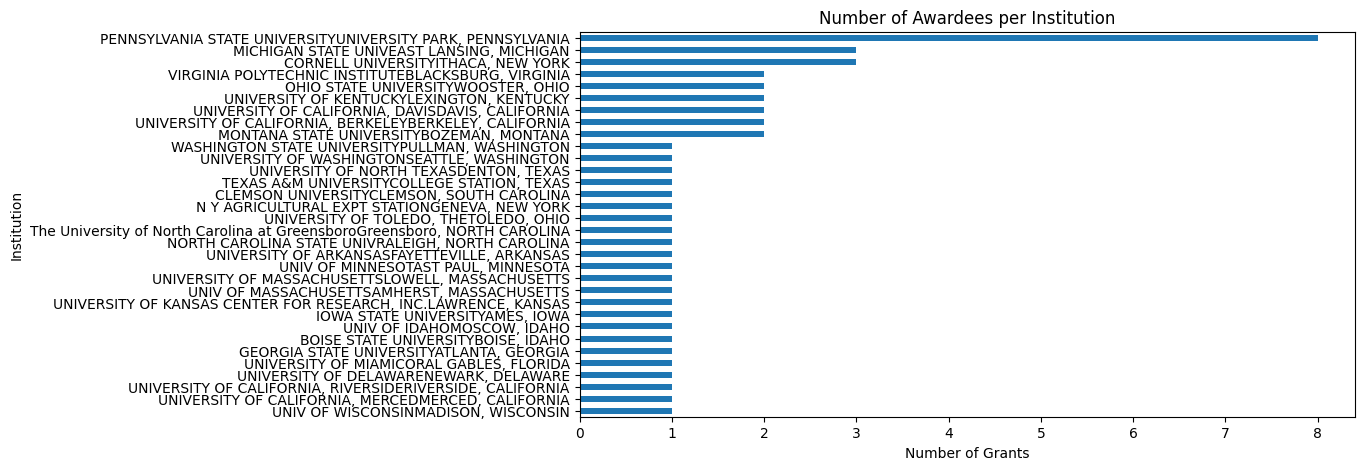

In [4]:
# Bar chart of institutions
institution_counts = df['Institution'].value_counts()
plt.figure(figsize=(10,5))
institution_counts.plot(kind='barh')
plt.title('Number of Awardees per Institution')
plt.ylabel('Institution')
plt.xlabel('Number of Grants')
plt.gca().invert_yaxis()
plt.show()

I'd love to tidy the instituion names, but I don't see a consistent pattern to separate the city from the university name. Alas, it is what it is for now. 


## Award Total For Each Institution
Let's take a look in terms of sum value per institution and also state. To do this, we need to tidy our `Award Total` column first. 

In [5]:
# Remove 'INITIAL AWARD YEAR: 2023' from 'Award Total'
df['Award Total'] = df['Award Total'].str.split('INITIAL').str[0]

# Convert 'Award Total' to numeric values
df['Award Total'] = df['Award Total'].replace('Not Available', '0')  # Replace 'Not Available' with '0'
df['Award Total'] = df['Award Total'].replace('[\$,]', '', regex=True).astype(float)  # Remove dollar signs and commas, convert to float

# Calculate sum of award amounts for each institution
award_sums = df.groupby('Institution')['Award Total'].sum()

# Sort the sums in descending order
award_sums = award_sums.sort_values(ascending=False)

Let's visualize it. 

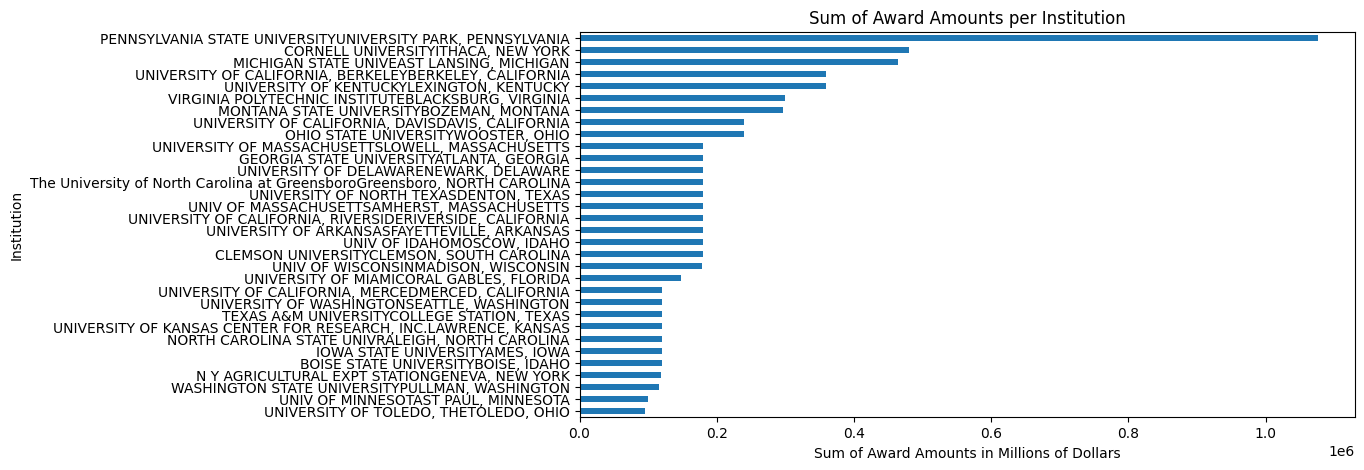

In [6]:
# Create bar plot
plt.figure(figsize=(10,5))
award_sums.plot(kind='barh')  # Use 'barh' for horizontal bars
plt.title('Sum of Award Amounts per Institution')
plt.xlabel('Sum of Award Amounts in Millions of Dollars')
plt.ylabel('Institution')
plt.gca().invert_yaxis()  # This line is used to reverse the order of the institutions
plt.show()

Now let's sum by state. To do so, we need to first make a `State` column using the data found in our `Institution` column.

In [7]:
# Extract state from institution information
df['State'] = df['Institution'].apply(lambda x: x.split(',')[-1].strip())
df['State'] = df['State'].str.title() # convert to titlecase for consistency

# Calculate sum of award amounts for each state
df['Award Sum'] = df.groupby('State')['Award Total'].transform('sum')

# Calculate sum of award amounts for each state
state_sum = df.groupby('State')['Award Total'].transform('sum')


## Award Total by State
Now let's visualize the results. 

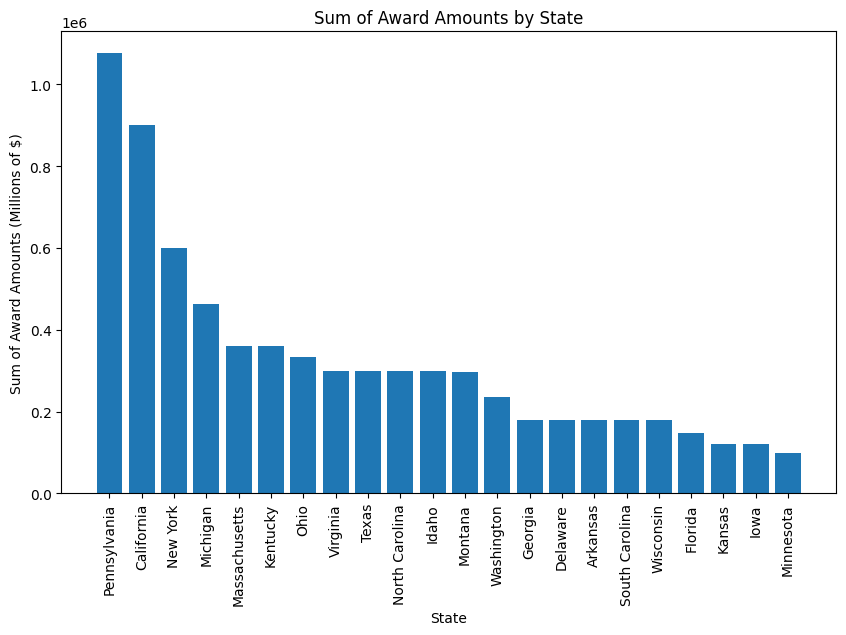

In [8]:
# Create a DataFrame with the state and corresponding sum of award amounts
state_award_sum = pd.DataFrame({'State': df['State'], 'Sum of Award Amounts': state_sum}).drop_duplicates()

# Sort the DataFrame by the sum of award amounts in descending order
state_award_sum = state_award_sum.sort_values(by='Sum of Award Amounts', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_award_sum['State'], state_award_sum['Sum of Award Amounts'])
plt.xlabel('State')
plt.ylabel('Sum of Award Amounts (Millions of $)')
plt.title('Sum of Award Amounts by State')
plt.xticks(rotation='vertical')
plt.show()

In [9]:
# Count the number of unique states
num_unique_states = df['State'].nunique()

# Print the number of unique states
print("Number of unique states:", num_unique_states)

# Count the number of unique states
num_unique_institutions = df['Institution'].nunique()

# Print the number of unique states
print("Number of unique institutions:", num_unique_institutions)

Number of unique states: 22
Number of unique institutions: 32


## Title word cloud
Let's check out what makes a winning title by using a word cloud.

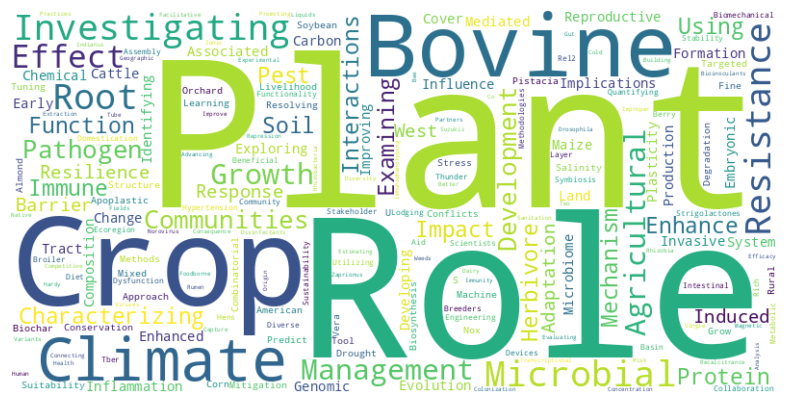

In [10]:
# Word cloud of titles
df['Title'] = df['Title'].str.title() # set words to title case
title_words = ' '.join(df['Title'])

# Word cloud settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_words)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# Set the stop words
stop_words = ['the', 'to', 'and', 'a', 'in', 'it', 'is', 'I', 'that', 'had', 'on', 'for', 'were', 'was', 'of', 'with', 'by', 'as', 'are', 'this', 'will', 'be', 'an', 'these', 'can', 'from', 'we', 'only', 'our', 'project', 'or', 'have', 'not', 'has', 'however', 'but', 'which', 'Through', 'been', 'However ', 'their', 'may', 'More', 'more', 'Additionally', 'how', 'How']

# Calculate word frequencies while excluding stop words
word_frequencies = Counter(word for word in title_words.split() if word.lower() not in stop_words)

# Sort word frequencies in descending order
top_words = word_frequencies.most_common(10)

# Print the top ten words
print("The most common words found in the winning awards:")
for word, frequency in top_words:
    print(word, frequency)

The most common words found in the winning awards:
Bovine 6
Climate 5
Investigating 5
Plant 5
Root 5
Crop 5
Role 5
Microbial 5
Resistance 5
Agricultural 4


## Project Summary Word Cloud

What about the award text? 

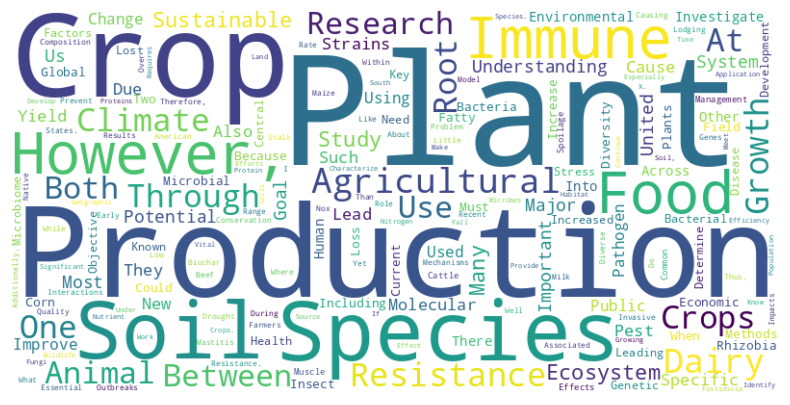

The most common words found in the winning awards:
Plant 33
Production 22
Crop 22
Species 17
Soil 16
However, 15
Food 15
Immune 15
Agricultural 15
Dairy 14


In [12]:
# Word cloud of titles
df['Summary'] = df['Summary'].str.title()
summary_words = ' '.join(df['Summary'])

# Calculate word frequencies while excluding stop words
word_frequencies_summary = Counter(word for word in summary_words.split() if word.lower() not in stop_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies_summary)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sort word frequencies in descending order
top_words_summary = word_frequencies_summary.most_common(10)

# Print the top ten words
print("The most common words found in the winning awards:")
for word, frequency in top_words_summary:
    print(word, frequency)


#summary_words

Looks like the top words cloud words share a lot of similiarity to those listed in NIFA's priorities.

## Overlaying Awardee Data With Gross Farm Receipts Per State
One thing that's sticking out what looks like a bias towards Penn State, and, potentially, the northeast in general. I think it'd be interesting to overlay the awardee data with the agricultural production data to see if there's any overlap. It would make sense for more awards to go to states that produce more food... right? 

Let's plot the award data to a map to look at spatial distribution of awards. 

The agricultural data is from [here](https://data.ers.usda.gov/reports.aspx?ID=17839#P824181736493415ea81545b92903503f_2_185iT0R0x0).

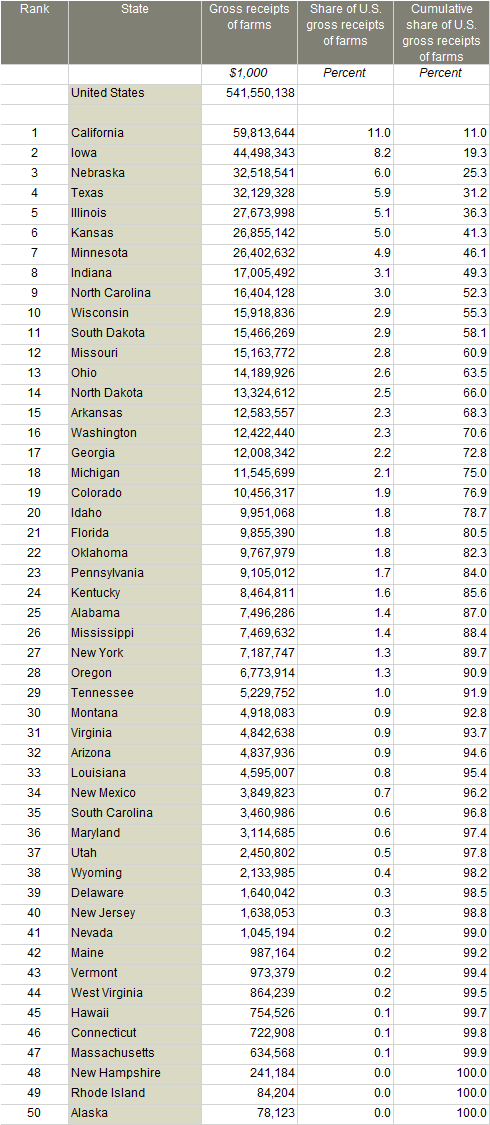

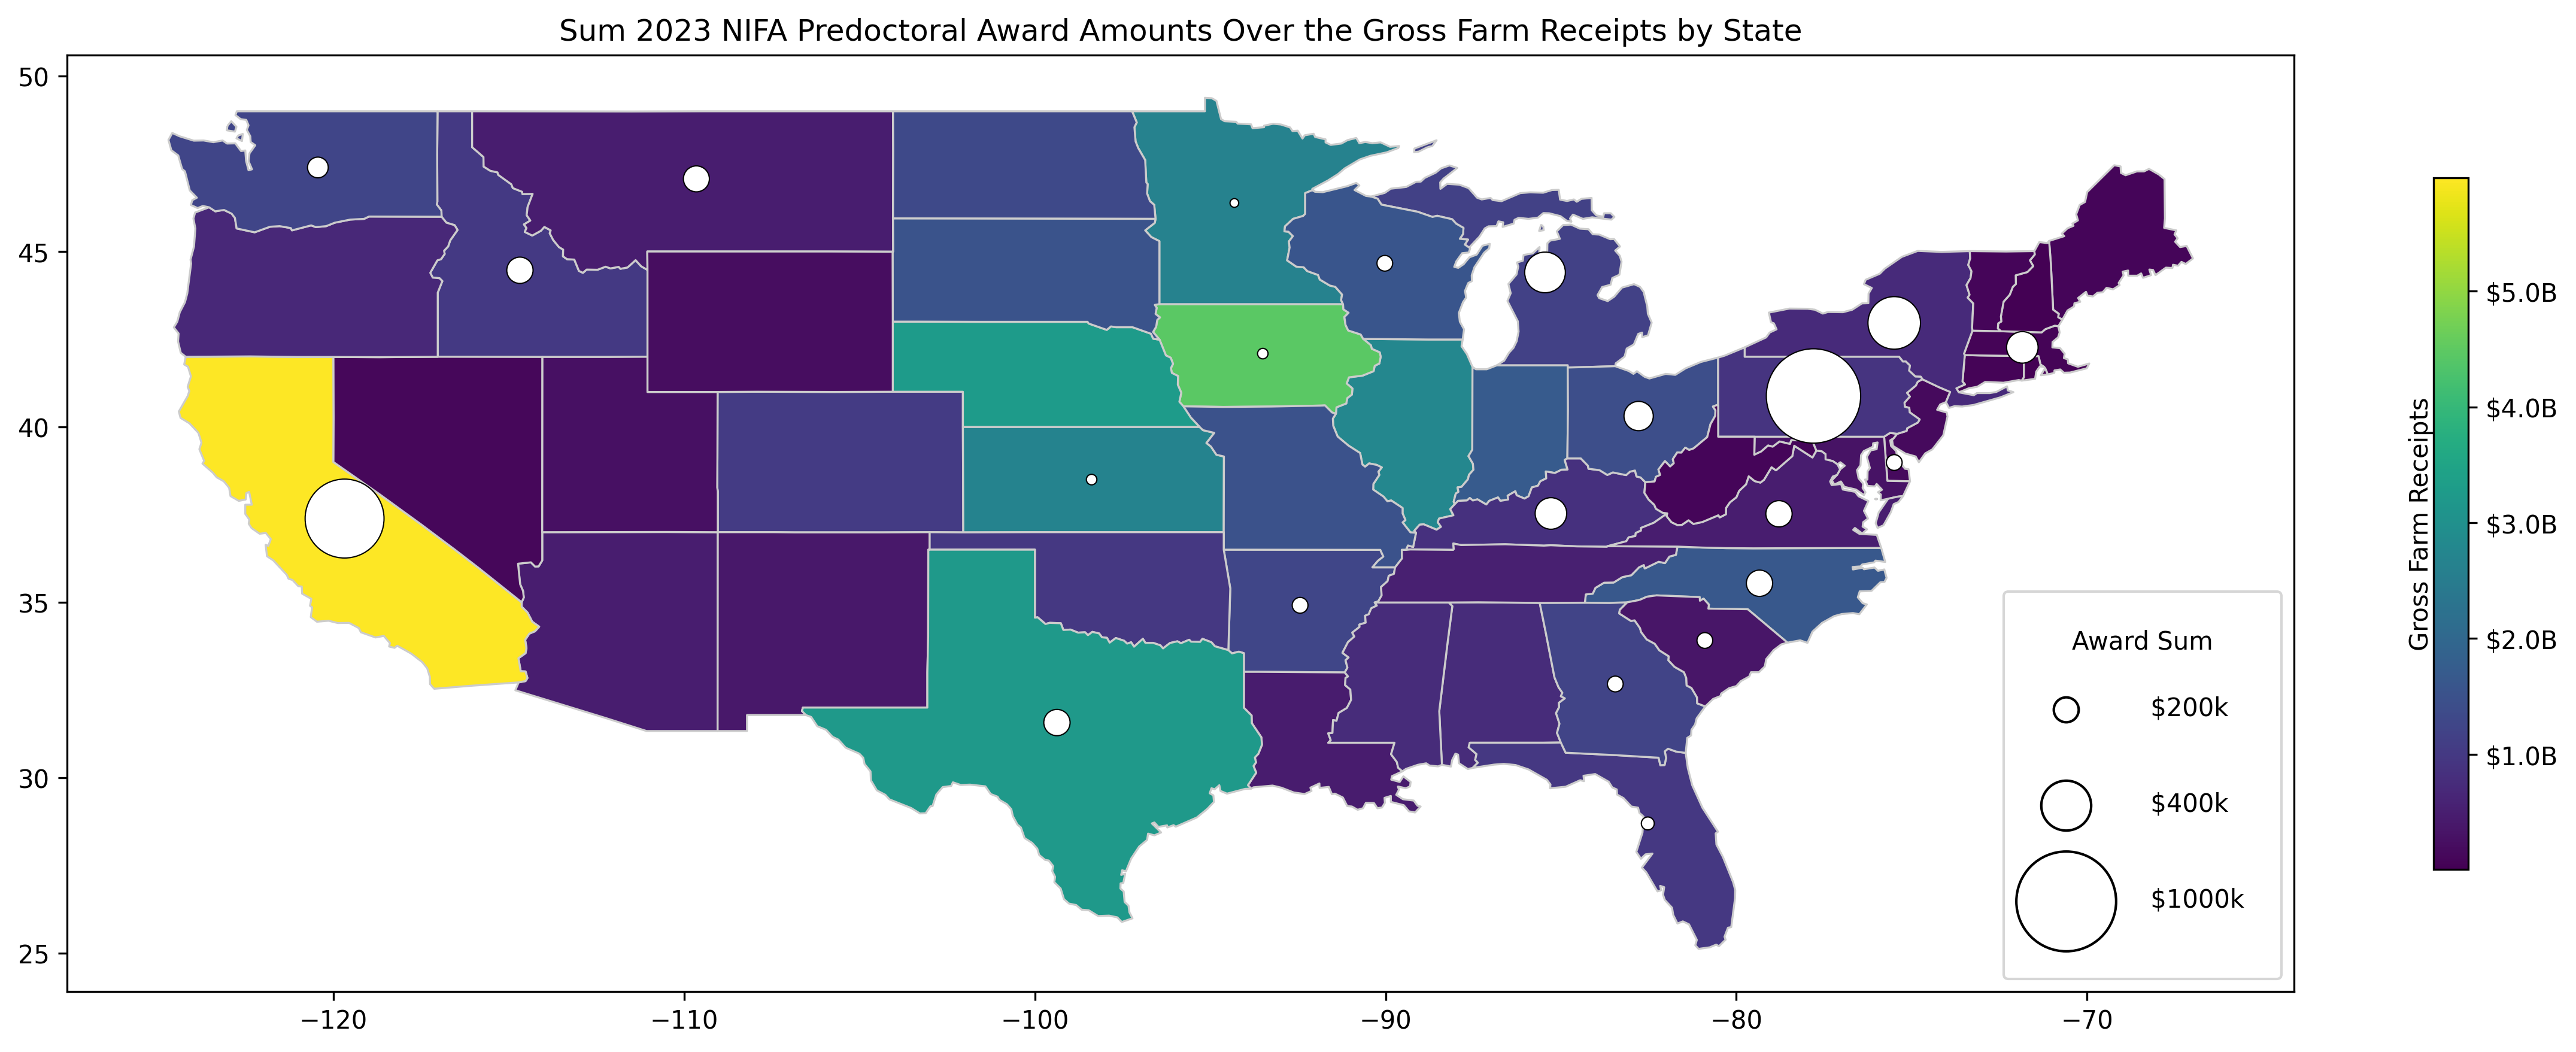

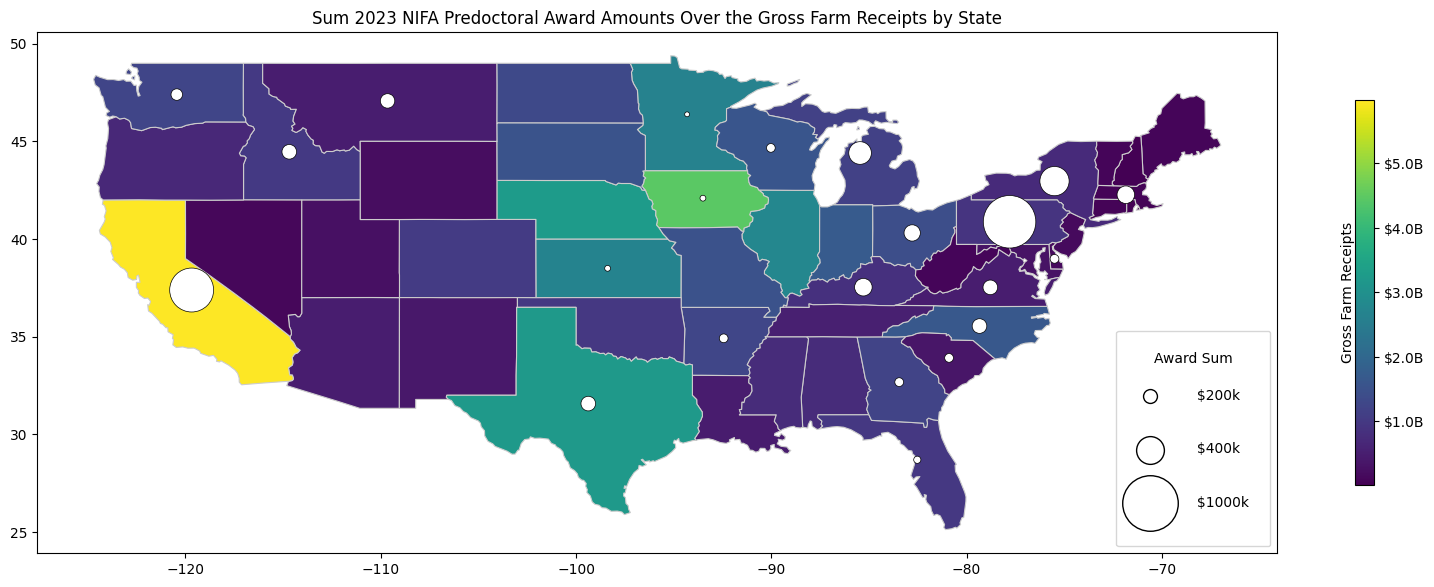

In [64]:
import warnings
warnings.filterwarnings('ignore')

# Create a DataFrame from your data
data = {
    'State': ['California', 'Iowa', 'Nebraska', 'Texas', 'Illinois', 'Kansas', 'Minnesota', 'Indiana', 'North Carolina', 'Wisconsin', 'South Dakota', 'Missouri', 'Ohio', 'North Dakota', 'Arkansas', 'Washington', 'Georgia', 'Michigan', 'Colorado', 'Idaho', 'Florida', 'Oklahoma', 'Pennsylvania', 'Kentucky', 'Alabama', 'Mississippi', 'New York', 'Oregon', 'Tennessee', 'Montana', 'Virginia', 'Arizona', 'Louisiana', 'New Mexico', 'South Carolina', 'Maryland', 'Utah', 'Wyoming', 'Delaware', 'New Jersey', 'Nevada', 'Maine', 'Vermont', 'West Virginia', 'Connecticut', 'Massachusetts', 'New Hampshire', 'Rhode Island'],
    'Gross receipts of farms': [59813644, 44498343, 32518541, 32129328, 27673998, 26855142, 26402632, 17005492, 16404128, 15918836, 15466269, 15163772, 14189926, 13324612, 12583557, 12422440, 12008342, 11545699, 10456317, 9951068, 9855390, 9767979, 9105012, 8464811, 7496286, 7469632, 7187747, 6773914, 5229752, 4918083, 4842638, 4837936, 4595007, 3849823, 3460986, 3114685, 2450802, 2133985, 1640042, 1638053, 1045194, 987164, 973379, 864239, 722908, 634568, 241184, 84204]
}
mapdf = pd.DataFrame(data)

# Load a GeoDataFrame with the geometry of the US states
gdf = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Find the indices of the rows for Hawaii and Alaska
index_hawaii = gdf[gdf['name'] == 'Hawaii'].index 
index_alaska = gdf[gdf['name'] == 'Alaska'].index
index_pr = gdf[gdf['name'] == 'Puerto Rico'].index

# Drop these rows
gdf = gdf.drop(index_hawaii)
gdf = gdf.drop(index_alaska)
gdf = gdf.drop(index_pr)

# Merge the award_sums_df and mapdf dataframes
mapdf['State'] = mapdf['State'].str.title() # convert to titlecase
award_map_df = df.merge(mapdf, how='outer', left_on='State', right_on='State')

# Project to a suitable CRS
gdf_projected = gdf.to_crs("EPSG:3395")  # EPSG:3395 is a global Mercator projection
#print(gdf_projected.head)

# Set 'State' as index for award_map_df
award_map_df = award_map_df.set_index('State')

# Now join
gdf_projected['State'] = gdf_projected['name']
gdf_projected = gdf_projected.set_index('State')
merged = gdf_projected.merge(award_map_df, how='outer', left_on='State', right_on='State')

# Now calculate centroids
merged['centroid'] = merged.geometry.centroid

# Transform centroids back to geographic coordinate system
merged['centroid'] = merged['centroid'].to_crs("EPSG:4326")
merged['centroid_lon'] = merged['centroid'].apply(lambda point: point.x)
merged['centroid_lat'] = merged['centroid'].apply(lambda point: point.y)


# If 'centroid_lon' and 'centroid_lat' columns do not exist, check the 'geometry' column
if 'centroid_lon' not in merged.columns or 'centroid_lat' not in merged.columns:
    print("The 'geometry' column above should contain Point objects. If it does not, check the 'geometry' column in the 'merged' DataFrame.")
    print(merged['geometry'])

# Reset index to enable new df creation
merged = merged.reset_index()

# Drop unnecessary columns
new_df = merged[['State', 'density', 'geometry', 'Gross receipts of farms', 'Award Sum', 'centroid_lon', 'centroid_lat']]
new_df.loc[:, 'Award Sum'] = pd.to_numeric(new_df['Award Sum'], errors='coerce').fillna(0)

# Drop duplicates (since we're looking at state level)
new_df = new_df.drop_duplicates()

# Create GeoDataFrame and convert CRS
new_df = gpd.GeoDataFrame(new_df)
new_df = new_df.to_crs("EPSG:4326")

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')

# Create the map
map_plot = new_df.plot(column='Gross receipts of farms', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=new_df['Gross receipts of farms'].min(), vmax=new_df['Gross receipts of farms'].max()))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)


# Set the title of the colorbar
cbar.set_label('Gross Farm Receipts', labelpad=-60)

# Get the current labels
labels = [item.get_text() for item in cbar.ax.get_yticklabels()]

# Convert labels to integers, add B for billions, and add $ sign
labels = ['$' + '{:.1f}'.format(int(label)) + 'B' for label in labels]

# Set the new labels
cbar.ax.set_yticklabels(labels)

# Add circles to the map for award totals
for lon, lat, size in zip(new_df['centroid_lon'], new_df['centroid_lat'], new_df['Award Sum']):
    ax.add_patch(plt.Circle((lon, lat), size/800000, color='white', ec='black', linewidth=0.5))
    ax.set_aspect('equal')

# Create a custom legend... a bit jenky I know
legend_elements = [Line2D([0], [0], marker='o', color='w', label='\n     $200k\n',
                          markerfacecolor='white', markeredgecolor ='black', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='\n     $400k\n',
                          markerfacecolor='white', markeredgecolor ='black', markersize=20),
                   Line2D([0], [0], marker='o', color='w', label='\n     $1000k\n',
                          markerfacecolor='white', markeredgecolor ='black', markersize=40)]

# Add the legend to the plot
legend = ax.legend(handles=legend_elements, loc='lower right', borderpad=1.5, title='Award Sum')

# Set the title of the plot
ax.set_title('Sum 2023 NIFA Predoctoral Award Amounts Over the Gross Farm Receipts by State')

# Save the figure
plt.savefig('map.png', dpi=300, bbox_inches='tight')

# Display the figure
Image("map.png")

## East Coast Bias?
Interesting. There does seem to be an east coast bias. Let's split the US in half to double check. 

The difference in total sum of awards between East and West is $3746494.0M.
States east of longitude centroid 100 took home 75.97% of the total sum of awards.
States west of longitude centroid 100 took home 24.03% of the total sum of awards.


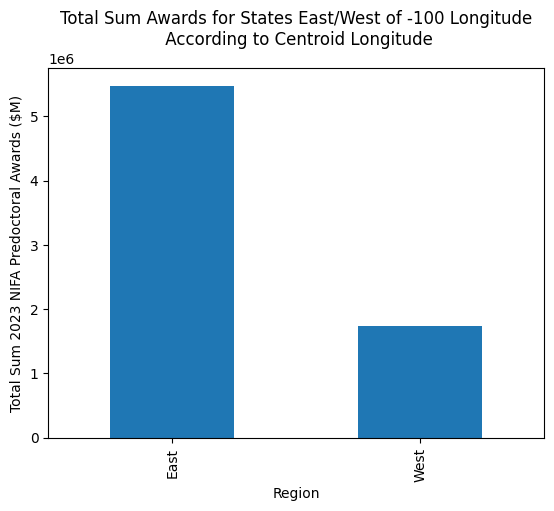

In [60]:
# Create a new column 'Region' based on the longitude of the centroid
new_df['Region'] = ['East' if lon >= -100 else 'West' for lon in new_df['centroid_lon']]

# Group by 'Region' and sum the 'Award Sum'
region_awards = new_df.groupby('Region')['Award Sum'].sum()

# Create the bar chart
region_awards.plot(kind='bar', title='Total Sum Awards for States East/West of -100 Longitude\n According to Centroid Longitude')
plt.ylabel('Total Sum 2023 NIFA Predoctoral Awards ($M)')
#plt.show()

# Save the figure
plt.savefig('region_awards.png', dpi=300, bbox_inches='tight')

# Display the figure
Image("region_awards.png")

# Calculate the difference
difference = region_awards['East'] - region_awards['West']

# Calculate the total sum of awards
total_awards = region_awards.sum()

# Calculate the difference as a percentage of the total
east_award_percentage = (region_awards['East'] / total_awards) * 100
west_award_percentage = (region_awards['West'] / total_awards) * 100

print(f"The difference in total sum of awards between East and West is ${difference}M.")
print(f"States east of longitude centroid 100 took home {east_award_percentage:.2f}% of the total sum of awards.")
print(f"States west of longitude centroid 100 took home {west_award_percentage:.2f}% of the total sum of awards.")